

---


# **🦗 Detecting Harmful Insects 🐛**

---




## **🧠 About YOLOv8 (You Only Look Once - Version 8)**

---


YOLOv8 is the latest and most advanced version of the popular YOLO (You Only Look Once) object detection algorithm developed by Ultralytics.

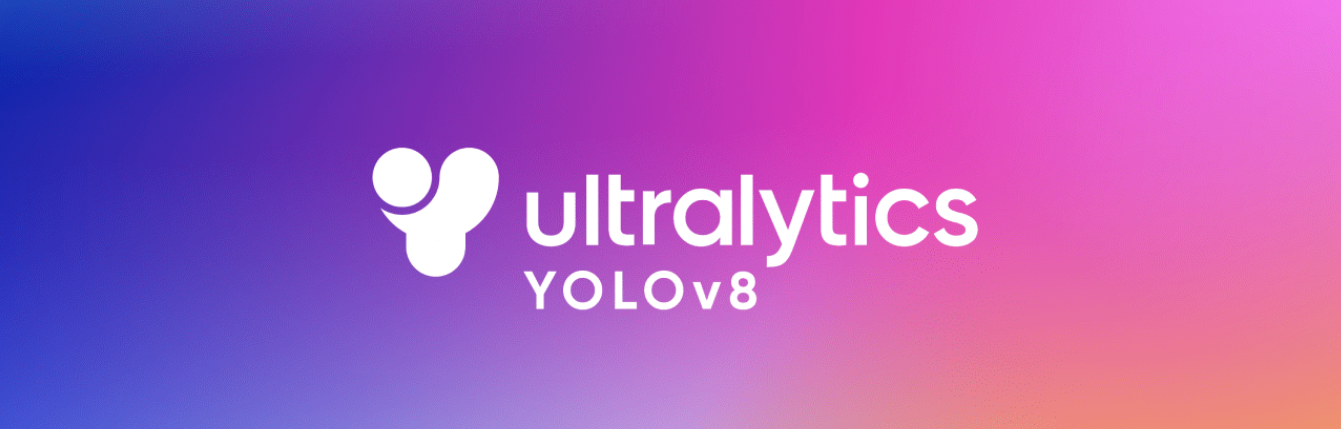

It is designed for real-time object detection, image segmentation, and classification tasks.

YOLOv8 stands out due to its:

🚀 High speed and accuracy in detecting objects

🧩 Lightweight architecture, making it suitable for real-time applications

🔧 Ease of use with a simple API for training, validation, and inference

🔍 Support for multiple tasks: Detection, Segmentation, Classification, and Pose Estimation

 We use a pretrained YOLOv8 model to detect and classify insects as harmful or non-harmful, supporting smarter and more sustainable pest control strategies in agriculture.




---


## 🏗️ **YOLOv8 Architecture**

---

 It consists of the following main components:



*   Backbone: Extracts features from the input image using a lightweight version of CSPDarknet.
*   Neck: Combines features at different scales using PAN or FPN, helping detect small and large objects.


*   Head: Makes final predictions like bounding boxes, objectness scores, and class probabilities.

*   Anchor-Free Design: YOLOv8 removes the need for anchor boxes, making training faster and simpler.

*   Modular Design: Easily adaptable for multiple tasks like detection, segmentation, classification, and pose estimation.






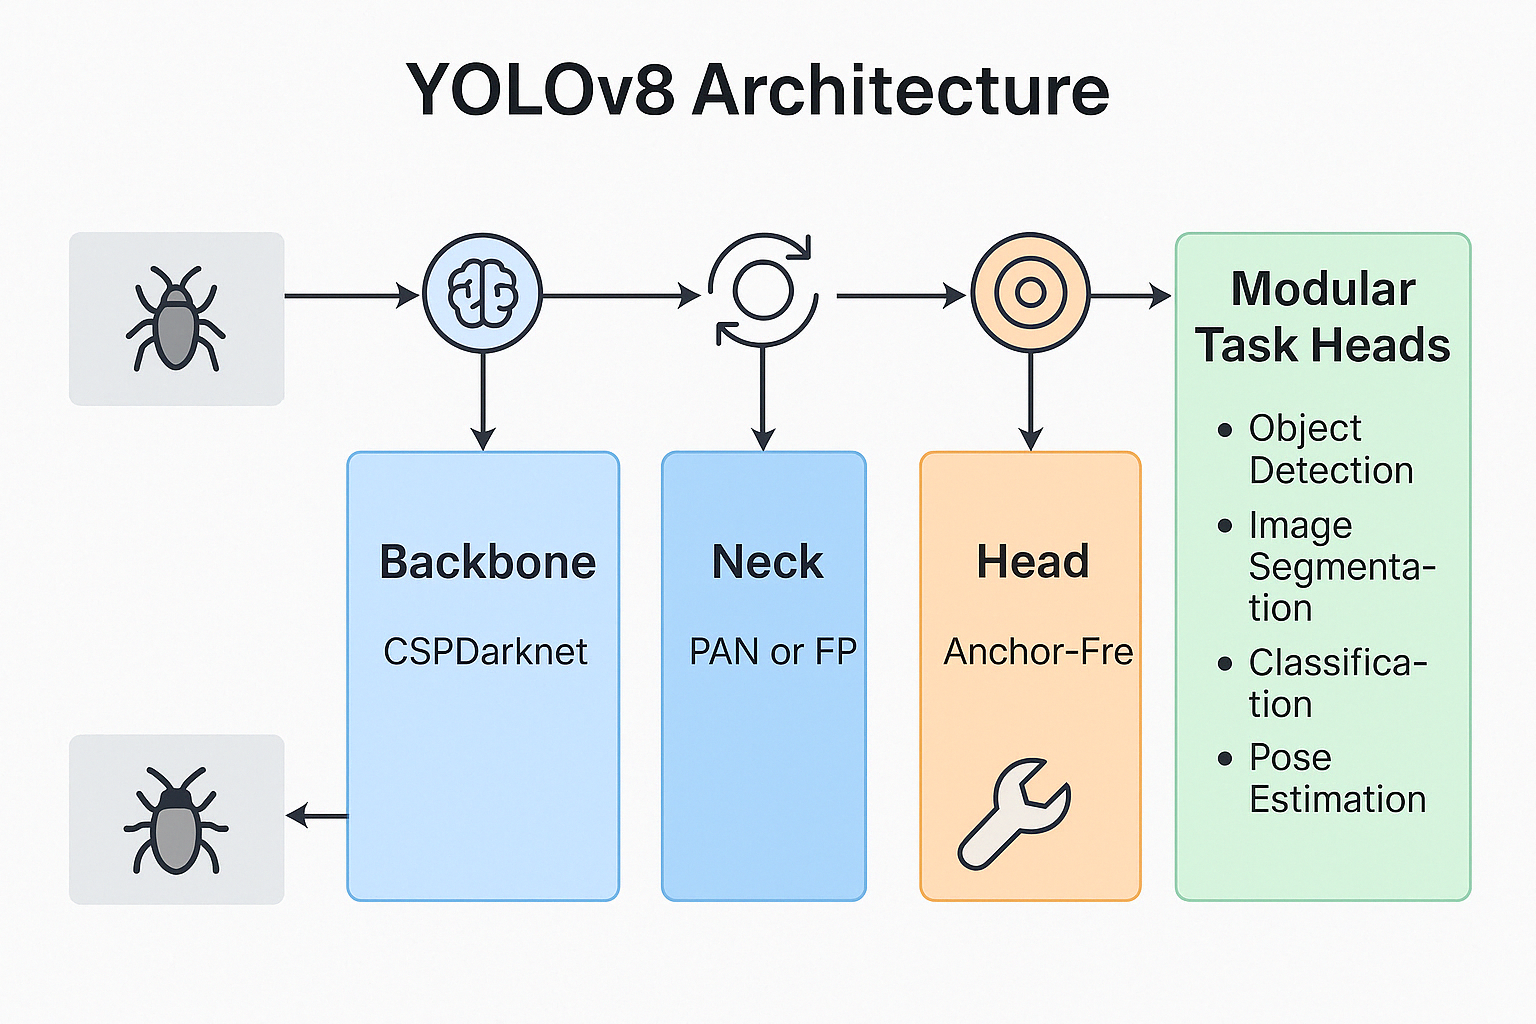

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_images_from_subfolders(base_folder_path, num_images=3):
    """
    This function will read and display 'num_images' from each pest folder inside the base folder.

    Parameters:
    - base_folder_path: Path to the base folder containing pest folders
    - num_images: Number of images to display from each pest folder (default is 5)
    """
    # List all subfolders in the base folder (i.e., pest folders)
    subfolders = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]

    for subfolder in subfolders:
        subfolder_path = os.path.join(base_folder_path, subfolder)

        # Get a list of all image files in the pest folder
        image_files = [f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

        # Limit the number of images to display
        image_files = image_files[:num_images]

        if image_files:
            # Create subplots for the images in this pest folder
            fig, axes = plt.subplots(1, len(image_files), figsize=(15, 3))
            if len(image_files) == 1:
                axes = [axes]

            for ax, image_file in zip(axes, image_files):
                img_path = os.path.join(subfolder_path, image_file)

                # Open the image
                with Image.open(img_path) as img:
                    # Display the image
                    ax.imshow(img)
                    ax.axis('off')  # Hide the axes

                # Set the title as the image file name
                ax.set_title(image_file)

            plt.suptitle(subfolder)  # Add title for the pest folder
            plt.tight_layout()
            plt.show()
        else:
            print(f"No images found in the folder: {subfolder}")

# Example: Display 5 images from each pest folder
base_folder_path = '/content/drive/MyDrive/farm_insects'  # Adjust with your base folder path
display_images_from_subfolders(base_folder_path)


In [ ]:
import os

# Supported image formats
image_extensions = ('.jpg', '.jpeg', '.png')

# Define the path to the dataset directory
folder_path = '/content/drive/MyDrive/farm_insects'  # Adjust to your actual path

# Check if the directory exists
if os.path.exists(folder_path):
    pest_folders = sorted(os.listdir(folder_path))

    print("=" * 70)
    print(" 🐛 Dataset Summary: Image Count and Total Size per Category ")
    print("=" * 70)

    for idx, pest in enumerate(pest_folders, 1):
        pest_path = os.path.join(folder_path, pest)
        if os.path.isdir(pest_path):
            image_files = [f for f in os.listdir(pest_path) if f.lower().endswith(image_extensions)]
            total_size_kb = sum(os.path.getsize(os.path.join(pest_path, f)) for f in image_files) / 1024  # in KB

            print(f"{idx}. 📂 {pest:<40} | 🖼️ {len(image_files):<3} images | 📦 {total_size_kb:.2f} KB")

    print("=" * 70)
    print(f" ✅ Total Pest Categories Scanned: {len(pest_folders)}")
    print("=" * 70)

else:
    print("⚠️ Error: The specified folder path does not exist. Please check the path.")


 🐛 Dataset Summary: Image Count and Total Size per Category 
1. 📂 Africanized Honey Bees (Killer Bees)     | 🖼️ 96  images | 📦 20646.15 KB
2. 📂 Aphids                                   | 🖼️ 87  images | 📦 30626.43 KB
3. 📂 Armyworms                                | 🖼️ 94  images | 📦 36341.53 KB
4. 📂 Brown Marmorated Stink Bugs              | 🖼️ 114 images | 📦 47064.22 KB
5. 📂 Cabbage Loopers                          | 🖼️ 104 images | 📦 18675.19 KB
6. 📂 Citrus Canker                            | 🖼️ 104 images | 📦 32818.12 KB
7. 📂 Colorado Potato Beetles                  | 🖼️ 112 images | 📦 23492.87 KB
8. 📂 Corn Borers                              | 🖼️ 114 images | 📦 16679.21 KB
9. 📂 Corn Earworms                            | 🖼️ 110 images | 📦 40137.14 KB
10. 📂 Fall Armyworms                           | 🖼️ 110 images | 📦 40665.31 KB
11. 📂 Fruit Flies                              | 🖼️ 100 images | 📦 27561.03 KB
12. 📂 Spider Mites                             | 🖼️ 118 images | 📦 45428.28 KB


In [ ]:
# Step 1: Install YOLOv8 (Ultralytics)
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 869.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
# Step 2: Import YOLOv8
from ultralytics import YOLO
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import shutil
from sklearn.model_selection import train_test_split
from pathlib import Path

# Source folder
source_folder = Path("/content/drive/MyDrive/farm_insects")

# Target folder (YOLO expects: train/class_name/, val/class_name/)
base_path = Path("/content/insect_dataset_yolo")
train_path = base_path / "train"
val_path = base_path / "val"

# Clear and create directories
for path in [train_path, val_path]:
    if path.exists(): shutil.rmtree(path)
    path.mkdir(parents=True, exist_ok=True)

# Split each class folder
for class_dir in source_folder.iterdir():
    if class_dir.is_dir():
        images = list(class_dir.glob("*.*"))
        train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

        # Copy to train/ and val/
        for img in train_imgs:
            target_dir = train_path / class_dir.name
            target_dir.mkdir(parents=True, exist_ok=True)
            shutil.copy(img, target_dir / img.name)

        for img in val_imgs:
            target_dir = val_path / class_dir.name
            target_dir.mkdir(parents=True, exist_ok=True)
            shutil.copy(img, target_dir / img.name)


In [ ]:
# Load classification model
model = YOLO('yolov8n-cls.pt')  # or yolov8m-cls.pt for better accuracy

# Train
model.train(
    data=str(base_path),  # path with train/ and val/ folders
    epochs=20,
    imgsz=224,
    batch=32
)


100%|██████████| 5.31M/5.31M [00:00<00:00, 337MB/s]


Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/insect_dataset_yolo, epochs=20, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 5.35M/5.35M [00:00<00:00, 286MB/s]


AMP: checks passed ✅


train: Scanning /content/insect_dataset_yolo/train... 1256 images, 0 corrupt: 100%|██████████| 1256/1256 [00:00<00:00, 1958.06it/s]

train: WARNING ⚠️ /content/insect_dataset_yolo/train/Armyworms/Image_38.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/insect_dataset_yolo/train/Thrips/Image_11.jpg: corrupt JPEG restored and saved


train: New cache created: /content/insect_dataset_yolo/train.cache


val: Scanning /content/insect_dataset_yolo/val... 323 images, 0 corrupt: 100%|██████████| 323/323 [00:00<00:00, 611.55it/s]

val: WARNING ⚠️ /content/insect_dataset_yolo/val/Spider Mites/Image_45.jpg: corrupt JPEG restored and saved
val: New cache created: /content/insect_dataset_yolo/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20     0.387G      2.713         32        224:   5%|▌         | 2/40 [00:01<00:25,  1.51it/s]


100%|██████████| 755k/755k [00:00<00:00, 102MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all      0.384      0.737



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all      0.576      0.913



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all      0.678      0.938



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]

                   all        0.7      0.975



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all      0.746      0.963



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all      0.746      0.975



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all       0.78      0.963



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all       0.78      0.969



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all      0.799      0.975



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.572G     0.5165          8        224: 100%|██████████| 40/40 [00:27<00:00,  1.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]

                   all      0.771      0.969



      Epoch    GPU_mem       loss  Instances       Size


      11/20      0.58G     0.4777          8        224: 100%|██████████| 40/40 [00:29<00:00,  1.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:06<00:00,  1.00s/it]

                   all      0.789      0.966



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.588G     0.3947          8        224: 100%|██████████| 40/40 [00:25<00:00,  1.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:06<00:00,  1.00s/it]

                   all      0.799      0.972



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.596G     0.4134          8        224: 100%|██████████| 40/40 [00:26<00:00,  1.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:03<00:00,  1.57it/s]

                   all      0.805      0.972



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.604G     0.3614          8        224: 100%|██████████| 40/40 [00:26<00:00,  1.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all      0.793      0.975



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.613G     0.3664          8        224: 100%|██████████| 40/40 [00:26<00:00,  1.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:06<00:00,  1.05s/it]

                   all      0.802      0.972



      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.621G     0.3246          8        224: 100%|██████████| 40/40 [00:25<00:00,  1.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all      0.789      0.975



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.629G     0.3126          8        224: 100%|██████████| 40/40 [00:26<00:00,  1.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all      0.799      0.981



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.637G     0.3049          8        224: 100%|██████████| 40/40 [00:26<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all      0.799      0.981



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.645G     0.3054          8        224: 100%|██████████| 40/40 [00:26<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]

                   all      0.799      0.978



      Epoch    GPU_mem       loss  Instances       Size


      20/20     0.654G     0.3012          8        224: 100%|██████████| 40/40 [00:26<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all      0.796      0.975



20 epochs completed in 0.179 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,454,095 parameters, 0 gradients, 3.3 GFLOPs
train: /content/insect_dataset_yolo/train... found 1256 images in 15 classes ✅ 
val: /content/insect_dataset_yolo/val... found 323 images in 15 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:08<00:00,  1.35s/it]


                   all      0.799      0.981
Speed: 0.1ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f3b956d6fd0>
curves: []
curves_results: []
fitness: 0.8900928795337677
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7987616062164307, 'metrics/accuracy_top5': 0.9814241528511047, 'fitness': 0.8900928795337677}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.0700420866884797, 'inference': 0.2464125975233677, 'loss': 0.00020788235221288437, 'postprocess': 0.00037890092931245776}
task: 'classify'
top1: 0.7987616062164307
top5: 0.9814241528511047

In [ ]:
# Evaluate performance on validation set
metrics = model.val()


Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,454,095 parameters, 0 gradients, 3.3 GFLOPs
train: /content/insect_dataset_yolo/train... found 1256 images in 15 classes ✅ 
val: /content/insect_dataset_yolo/val... found 323 images in 15 classes ✅ 
test: None...


val: Scanning /content/insect_dataset_yolo/val... 323 images, 0 corrupt: 100%|██████████| 323/323 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/insect_dataset_yolo/val/Spider Mites/Image_45.jpg: corrupt JPEG restored and saved



               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:06<00:00,  1.65it/s]


                   all      0.799      0.981
Speed: 0.3ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


In [ ]:
import pandas as pd

# Path to your CSV file
csv_path = '/content/yolov5/runs/classify/train/results.csv'

# Read the CSV file
results_df = pd.read_csv(csv_path)

# Display the full results DataFrame (optional)
print("Full results:")
print(results_df.tail())

# Extract the final epoch's values
final_epoch = results_df.iloc[-1]
print("\nFinal Epoch Results:")
print(f"Epoch: {final_epoch['epoch']}")
print(f"Top-1 Accuracy: {final_epoch['metrics/accuracy_top1']}")
print(f"Top-5 Accuracy: {final_epoch['metrics/accuracy_top5']}")


Full results:
    epoch     time  train/loss  metrics/accuracy_top1  metrics/accuracy_top5  \
15     16  519.003     0.32464                0.78947                0.97523   
16     17  550.864     0.31262                0.79876                0.98142   
17     18  581.354     0.30491                0.79876                0.98142   
18     19  613.492     0.30538                0.79876                0.97833   
19     20  643.386     0.30120                0.79567                0.97523   

    val/loss    lr/pg0    lr/pg1    lr/pg2  
15   0.69104  0.000135  0.000135  0.000135  
16   0.56087  0.000109  0.000109  0.000109  
17   0.53654  0.000083  0.000083  0.000083  
18   0.51638  0.000057  0.000057  0.000057  
19   0.70390  0.000031  0.000031  0.000031  

Final Epoch Results:
Epoch: 20.0
Top-1 Accuracy: 0.79567
Top-5 Accuracy: 0.97523


In [ ]:
from google.colab import files
files.download('/content/yolov5/runs/classify/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Path to the confusion matrix image
confusion_matrix_path = "/content/yolov5/runs/classify/train/confusion_matrix_normalized.png"

# Download the confusion matrix
files.download(confusion_matrix_path)

# Path to the results CSV file
results_csv_path = "/content/yolov5/runs/classify/train/results.csv"

# Download the results CSV
files.download(results_csv_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the CSV file with comma as the delimiter
results_df = pd.read_csv('/content/results.csv')
df = pd.DataFrame(results_df)

# Check the columns after loading the data
print(df.columns)

results_df.head()


Index(['epoch', 'time', 'train/loss', 'metrics/accuracy_top1',
       'metrics/accuracy_top5', 'val/loss', 'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


epoch      time  train/loss  metrics/accuracy_top1  metrics/accuracy_top5  \
0      1   37.1458     2.63601                0.38390                0.73684   
1      2   68.8756     2.02258                0.57585                0.91331   
2      3  103.0110     1.44906                0.67802                0.93808   
3      4  134.0820     1.07720                0.69969                0.97523   
4      5  166.2500     0.88117                0.74613                0.96285   

   val/loss    lr/pg0    lr/pg1    lr/pg2  
0   2.43880  0.000171  0.000171  0.000171  
1   1.47917  0.000329  0.000329  0.000329  
2   0.97843  0.000470  0.000470  0.000470  
3   0.74983  0.000448  0.000448  0.000448  
4   0.66013  0.000422  0.000422  0.000422

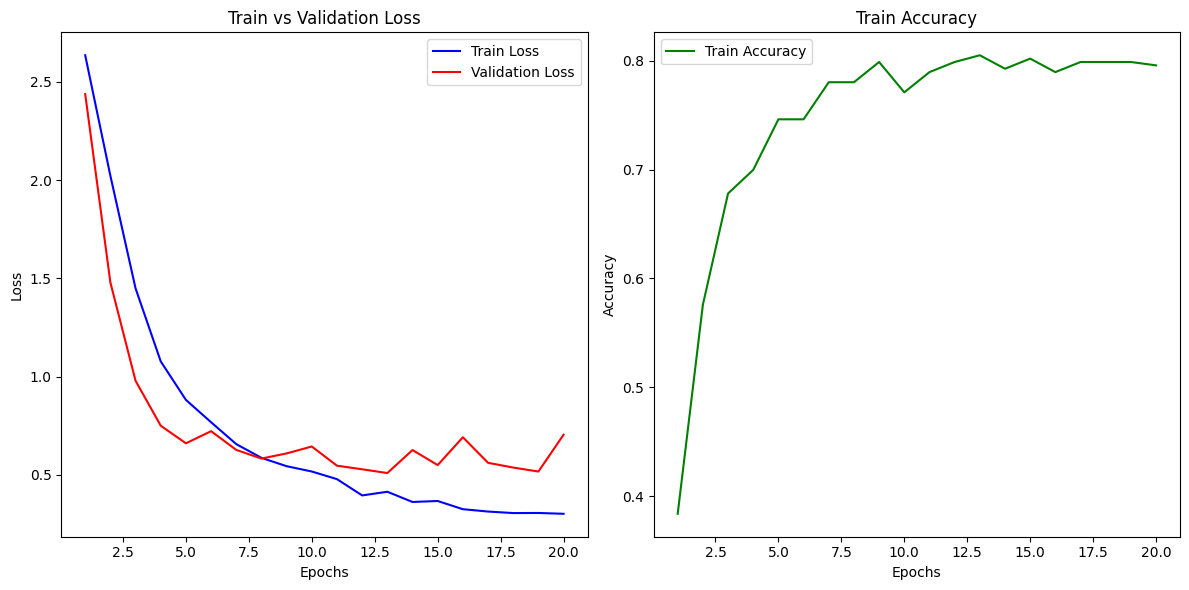

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.read_csv('/content/results.csv')
df = pd.DataFrame(results_df)

# Extract columns
epochs = df['epoch']
train_loss = df['train/loss']
train_accuracy = df['metrics/accuracy_top1']
val_loss = df['val/loss']

# Plot Train Loss and Validation Loss
plt.figure(figsize=(12, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Train Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='red')
plt.title("Train vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label="Train Accuracy", color='green')
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()



image 1/1 /content/insect Colorado Potato Beetles.jpg: 224x224 Colorado Potato Beetles 0.98, Fruit Flies 0.01, Africanized Honey Bees (Killer Bees) 0.00, Western Corn Rootworms 0.00, Armyworms 0.00, 17.3ms
Speed: 3.9ms preprocess, 17.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


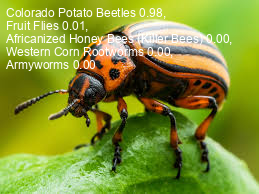


══════════════════════════════════════════════════
               🔍 PREDICTION RESULT                
══════════════════════════════════════════════════
🪲 Pest Detected     : Colorado Potato Beetles
📊 Confidence Score : 98.24%
══════════════════════════════════════════════════

⚠️  ALERT: This is a harmful pest! Take action immediately.
══════════════════════════════════════════════════



In [ ]:
from ultralytics import YOLO


# Define your list of harmful pests
harmful_pests = [
    "Africanized Honey Bees (Killer Bees)",
    "Aphids",
    "Armyworms",
    "Brown Marmorated Stink Bugs",
    "Cabbage Loopers",
    "Citrus Canker",
    "Colorado Potato Beetles",
    "Corn Borers",
    "Corn Earworms",
    "Fall Armyworms",
    "Fruit Flies",
    "Spider Mites",
    "Thrips",
    "Tomato Hornworms",
    "Western Corn Rootworms"
]
# Load the trained model (best weights)
model = YOLO('/content/best.pt')


# Test the model with a new image
image_path = '/content/insect Colorado Potato Beetles.jpg'  # Replace with your test image path
results = model(image_path)

# Show the results (image with bounding boxes and labels)
# results[0].plot()  # This will display the image with predictions


# Get predicted class name and confidence
pred = results[0].probs  # probabilities for classification
class_index = pred.top1  # index of the most likely class
confidence = pred.data[class_index].item() * 100  # confidence percentage
class_name = results[0].names[class_index]  # get class label name

# Afficher l'image avec prédiction (si tu veux)
results[0].show()

# Affichage amélioré
print("\n" + "═" * 50)
print("🔍 PREDICTION RESULT".center(50))
print("═" * 50)
print(f"🪲 Pest Detected     : {class_name}")
print(f"📊 Confidence Score : {confidence:.2f}%")
print("═" * 50 + "\n")

# Alert condition: class is harmful AND confidence >= 40%
is_harmful = class_name in harmful_pests and confidence >= 40

if is_harmful:
    print("⚠️  ALERT: This is a harmful pest! Take action immediately.")

    # Encadrer toute l'image
    width, height = img.size
    draw.rectangle([0, 0, width - 1, height - 1], outline="red", width=8)
    draw.text((10, 10), f"{class_name} ({confidence:.1f}%)", fill="red")

print("═" * 50 + "\n")




image 1/1 /content/not harmful pest.jpg: 224x224 Fruit Flies 0.38, Colorado Potato Beetles 0.19, Thrips 0.15, Aphids 0.13, Africanized Honey Bees (Killer Bees) 0.04, 22.3ms
Speed: 6.6ms preprocess, 22.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


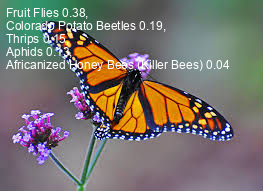


══════════════════════════════════════════════════
               🔍 PREDICTION RESULT                
══════════════════════════════════════════════════
🪲 Pest Detected     : Fruit Flies
📊 Confidence Score : 37.88%
══════════════════════════════════════════════════

✅ This pest may not be calsified as harmful.
══════════════════════════════════════════════════



In [ ]:
from ultralytics import YOLO


# Define your list of harmful pests
harmful_pests = [
    "Africanized Honey Bees (Killer Bees)",
    "Aphids",
    "Armyworms",
    "Brown Marmorated Stink Bugs",
    "Cabbage Loopers",
    "Citrus Canker",
    "Colorado Potato Beetles",
    "Corn Borers",
    "Corn Earworms",
    "Fall Armyworms",
    "Fruit Flies",
    "Spider Mites",
    "Thrips",
    "Tomato Hornworms",
    "Western Corn Rootworms"
]
# Load the trained model (best weights)
model = YOLO('/content/best.pt')


# Test the model with a new image
image_path = '/content/not harmful pest.jpg'  # Replace with your test image path
results = model(image_path)

# Show the results (image with bounding boxes and labels)
# results[0].plot()  # This will display the image with predictions


# Get predicted class name and confidence
pred = results[0].probs  # probabilities for classification
class_index = pred.top1  # index of the most likely class
confidence = pred.data[class_index].item() * 100  # confidence percentage
class_name = results[0].names[class_index]  # get class label name

# Afficher l'image avec prédiction (si tu veux)
results[0].show()

# Affichage amélioré
print("\n" + "═" * 50)
print("🔍 PREDICTION RESULT".center(50))
print("═" * 50)
print(f"🪲 Pest Detected     : {class_name}")
print(f"📊 Confidence Score : {confidence:.2f}%")
print("═" * 50 + "\n")

# Alert condition: class is harmful AND confidence >= 40%
is_harmful = class_name in harmful_pests and confidence >= 40

if is_harmful:
    print("⚠️  ALERT: This is a harmful pest! Take action immediately.")
else:
    print("✅ This pest may not be calsified as harmful.")
print("═" * 50 + "\n")



In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Define harmful pests
harmful_pests = [
    "Africanized Honey Bees (Killer Bees)", "Aphids", "Armyworms",
    "Brown Marmorated Stink Bugs", "Cabbage Loopers", "Citrus Canker",
    "Colorado Potato Beetles", "Corn Borers", "Corn Earworms",
    "Fall Armyworms", "Fruit Flies", "Spider Mites",
    "Thrips", "Tomato Hornworms", "Western Corn Rootworms"
]

# Load YOLO model
model = YOLO('/content/best.pt')

# Video file (make sure it exists)
video_path = '/content/Eww....the Brown Marmorated Stink Bug! (30 sec).mp4'
cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    print(f"🔄 Processing frame {frame_count}")

    # Inference
    results = model(frame)
    annotated_frame = results[0].plot().copy()

    # Get classification result
    if results[0].probs is not None:
        pred = results[0].probs
        class_index = pred.top1
        confidence = pred.data[class_index].item() * 100
        class_name = results[0].names[class_index]

        # Draw label (with nicer styling)
        label = f'{class_name} ({confidence:.1f}%)'
        # Change position to the bottom-left corner
        height, width, _ = annotated_frame.shape
        cv2.putText(annotated_frame, label, (10, height - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Alert logic
        is_harmful = class_name in harmful_pests and confidence >= 40
        if is_harmful:
            print(f"⚠️ ALERT: Harmful pest detected: {class_name} ({confidence:.1f}%)")
            # Add a fancy alert box at the top
            cv2.rectangle(annotated_frame, (10, 50), (400, 100), (0, 0, 255), -1)  # red box
            cv2.putText(annotated_frame, '⚠️ Harmful Pest Detected!', (20, 80),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 3, cv2.LINE_AA)
        else:
            print(f"✅ Safe pest: {class_name} ({confidence:.1f}%)")
    else:
        print("🤷 No confident prediction.")

    # Show frame in Colab
    cv2_imshow(annotated_frame)

    # Optional: break after a few frames (e.g., for demo)
    if frame_count >= 5:
        break

# Cleanup
cap.release()
